In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv('E:\DataScience\Data\Titanic Survival Prediction/train.csv')
test_df = pd.read_csv('E:\DataScience\Data\Titanic Survival Prediction/test.csv')
combine = [train_df, test_df]

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Cameron, Miss. Clear Annie",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [10]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [11]:
#Categorical: Survived, Sex, and Embarked. Ordinal: Pclass.
# Continous: Age, Fare. Discrete: SibSp, Parch.

In [12]:
#Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

In [13]:
# check for the number of missing values per column

In [21]:
train_df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
# We may want to fill Age values as priority, however lets do correlation analysis to survival

In [21]:
# Section 1: Analyze data by visualizations

In [22]:
# 1.1: Analyze by pivoting for categorical and discrete features

In [8]:
#Let us start wih Pclass

In [10]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
#Analysis1: This means passengers of higher class has more chances of survival. Hence Pclass will be included in the model

In [12]:
# Analyze the next categorical variable Sex

In [13]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
#Analysis2: This means female passengers has more chances of survival. Hence Sex will be included in the model

In [17]:
# Analyze the next categorical variable Embarked

In [18]:
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [19]:
#Analysis3: Embarked C has more survival rate

In [20]:
# Analyze the next variable SibSp

In [21]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [22]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [23]:
#Analyze by visualizing data

In [24]:
# 1.2: Correlating numerical features with Survived

In [25]:
# Analyze Age

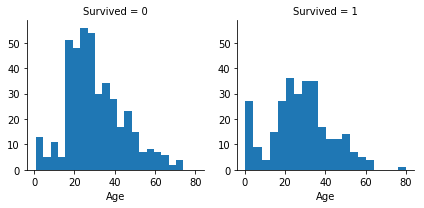

In [26]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [28]:
# Analysis4: Infants (Age <=4) had high survival rate. 
#Oldest passengers (Age = 80) survived. 
#Large number of 15-25 year olds did not survive. 
#Most passengers are in 15-35 age range.

In [29]:
# Analyze Fare

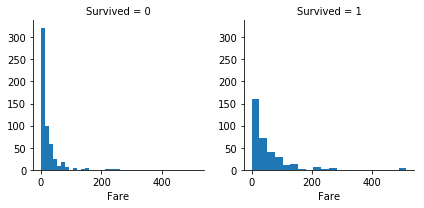

In [30]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=20)

In [25]:
# 1.3: Correlating numerical and ordinal features with Survived

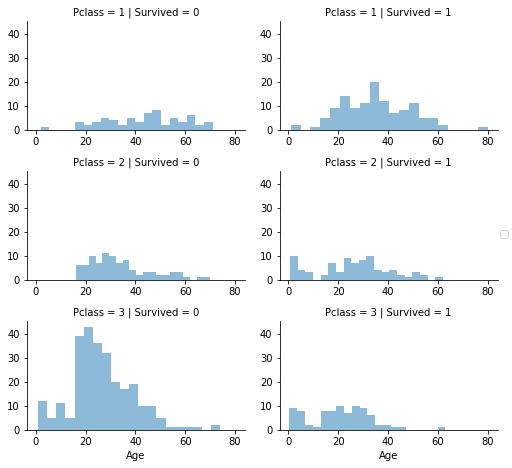

In [32]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [4]:
# THere seems to be correlation between Survived and PClass. 
#THere are more number of passengers in PClass 3, however survival rate is less. It is more in PClass = 1
# Age is also correlation with PClass. 

In [26]:
# 1.4: Correlating categorical features with Survived

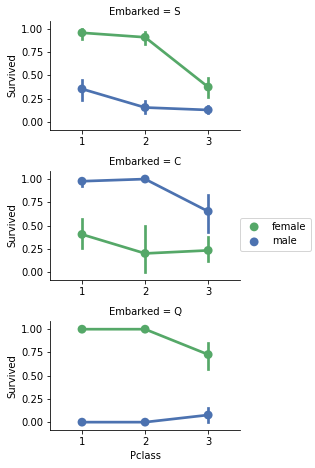

In [5]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

In [27]:
# 1.5: Correlating categorical and numerical features

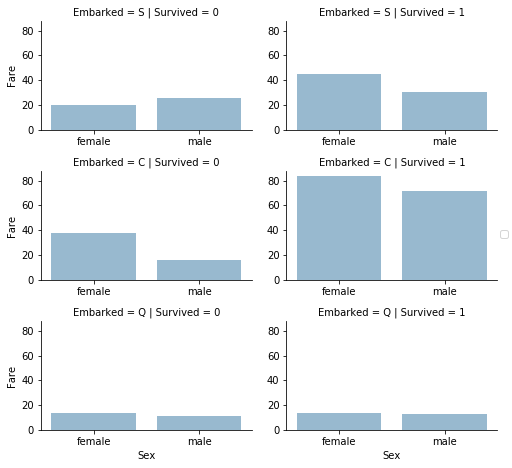

In [18]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [19]:
#Higher fare paying passengers had better survival. Port of embarkation correlates with survival rates. 

In [28]:
# Section 2: Wrangle data 

In [33]:
# 2.1 Drop features

In [3]:
print("Before", train_df.shape, test_df.shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_df, test_df]

print("After", train_df.shape, test_df.shape)

Before (891, 12) (418, 11)
After (891, 10) (418, 9)


In [34]:
# 2.2 Create new features

In [4]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [5]:
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [14]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values(by='Survived', ascending='false')

,Title,Survived
2,Mr,0.156673
4,Rare,0.347826
0,Master,0.575000
1,Miss,0.702703
3,Mrs,0.793651


In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [16]:
# Drop name

In [17]:
train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [18]:
# 2.3 Convert categorical features into numerical

In [19]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [20]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [23]:
# 2.4 Completing a numerical continuous feature Age for handling missing values

In [24]:
train_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Title
Survived,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307,0.407753
Pclass,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500,-0.173929
Sex,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333,0.502713
Age,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067,-0.104766
SibSp,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651,0.269623
Parch,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225,0.315784
Fare,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000,0.136310
Title,0.407753,-0.173929,0.502713,-0.104766,0.269623,0.315784,0.136310,1.000000


In [26]:
#guess Age values based on Pclass x Gender combinations.

In [27]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [28]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

In [29]:
#Let us create Age bands and determine correlations with Survived

In [30]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [31]:
#Let us replace Age with ordinals based on these bands.

In [32]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [33]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [34]:
#2.5 Create new feature combining existing features

In [35]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [36]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [37]:
#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [38]:
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [39]:
train_df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    2
Title       0
IsAlone     0
dtype: int64

In [43]:
train_df.Embarked.dropna().mode()[0]

'S'

In [45]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(train_df.Embarked.dropna().mode()[0])
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [46]:
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,0,1,0
1,1,1,1,2,71.2833,1,3,0
2,1,3,1,1,7.9250,0,2,1
3,1,1,1,2,53.1000,0,3,0
4,0,3,0,2,8.0500,0,1,1


In [47]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,7.8292,2,1,1
1,893,3,1,2,7.0000,0,3,0
2,894,2,0,3,9.6875,2,1,1
3,895,3,0,1,8.6625,0,1,1
4,896,3,1,1,12.2875,0,3,0


In [48]:
train_df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
Title       0
IsAlone     0
dtype: int64

In [49]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)

In [50]:
train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand
0,0,3,0,1,7.2500,0,1,0,"(-0.001, 7.91]"
1,1,1,1,2,71.2833,1,3,0,"(31.0, 512.329]"
2,1,3,1,1,7.9250,0,2,1,"(7.91, 14.454]"
3,1,1,1,2,53.1000,0,3,0,"(31.0, 512.329]"
4,0,3,0,2,8.0500,0,1,1,"(7.91, 14.454]"


In [57]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]
    
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,FareBand1
0,0,3,0,1,0,0,1,0,"(-0.512, 128.082]"
1,1,1,1,2,3,1,3,0,"(-0.512, 128.082]"
2,1,3,1,1,1,0,2,1,"(-0.512, 128.082]"
3,1,1,1,2,3,0,3,0,"(-0.512, 128.082]"
4,0,3,0,2,1,0,1,1,"(-0.512, 128.082]"
5,0,3,0,1,1,2,1,1,"(-0.512, 128.082]"
6,0,1,0,3,3,0,1,1,"(-0.512, 128.082]"
7,0,3,0,0,2,0,4,0,"(-0.512, 128.082]"
8,1,3,1,1,1,0,3,0,"(-0.512, 128.082]"
9,1,2,1,0,2,1,3,0,"(-0.512, 128.082]"


In [ ]:
train_df.head(10)

In [59]:
test_df.head(10)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,1
1,893,3,1,2,0,0,3,0
2,894,2,0,3,1,2,1,1
3,895,3,0,1,1,0,1,1
4,896,3,1,1,1,0,3,0
5,897,3,0,0,1,0,1,1
6,898,3,1,1,0,2,2,1
7,899,2,0,1,2,0,1,0
8,900,3,1,1,0,1,3,1
9,901,3,0,1,2,0,1,0


In [60]:
train_df.corr()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
Survived,1.000000,-0.338481,0.543351,-0.065095,0.295875,0.106811,0.407753,-0.203367
Pclass,-0.338481,1.000000,-0.131900,-0.119955,-0.628459,0.045702,-0.173929,0.135207
Sex,0.543351,-0.131900,1.000000,-0.086719,0.248940,0.116569,0.502713,-0.303646
Age,-0.065095,-0.119955,-0.086719,1.000000,0.026774,0.038064,-0.042927,0.063066
Fare,0.295875,-0.628459,0.248940,0.026774,1.000000,-0.091096,0.341665,-0.568942
Embarked,0.106811,0.045702,0.116569,0.038064,-0.091096,1.000000,0.045400,0.017807
Title,0.407753,-0.173929,0.502713,-0.042927,0.341665,0.045400,1.000000,-0.405813
IsAlone,-0.203367,0.135207,-0.303646,0.063066,-0.568942,0.017807,-0.405813,1.000000


In [61]:
#3 Predictive Modelling

In [62]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]

In [63]:
X_test  = test_df.drop("PassengerId", axis=1)

In [64]:
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

In [65]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.560000000000002

In [68]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,Sex,2.146107
5,Title,0.414497
4,Embarked,0.314020
6,IsAlone,0.065157
3,Fare,-0.029659
2,Age,-0.032433
0,Pclass,-0.989863


In [69]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.5

In [70]:
#k-Nearest Neighbors algorithm (or k-NN for short) 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.620000000000005

In [71]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.989999999999995

In [72]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\swathi08\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


78.340000000000003

In [73]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.450000000000003

In [74]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

C:\Users\swathi08\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


79.349999999999994

In [75]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.760000000000005

In [76]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

86.760000000000005

In [77]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,86.76
8,Decision Tree,86.76
1,KNN,84.62
0,Support Vector Machines,83.50
6,Stochastic Gradient Decent,79.35
2,Logistic Regression,78.56
7,Linear SVC,78.45
5,Perceptron,78.34
4,Naive Bayes,76.99


In [80]:
# Using Random forest
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })